In [54]:
import os
import numpy as np
import nibabel as nib
from monai.data import  DataLoader, Dataset, decollate_batch
from monai.utils import  first, set_determinism
import monai.transforms as transforms
from monai.transforms import Compose
from monai.visualize import matshow3d
from torch import torch
from monai.metrics import DiceMetric


# Setup data directory
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = os.getcwd() if directory is None else directory
print(root_dir)

# Set deterministic training for reproducibility
set_determinism(seed=0)

/home/hua/Muscle_seg


# Datalist

In [87]:
def create_dict():
    # Set the base path for the predictions
    base_path = os.path.join(root_dir, './Data/Stage_1/swinunetr_0/Helsinki/')  
    
    # Set the path for the label folder
    label_path = os.path.join(root_dir, './Data/Stage_1/Helsinki_label')
    
    # Find all predictions files
    predict_files = glob.glob(os.path.join(base_path, 'THIGH_*.nii.gz'))
    
    # Initialize an empty list for the dictionary
    ddict = []
    
    # Loop through each label file
    for prediction in predict_files:
        # Extract the prediction file name
        stripped_base_name = os.path.basename(prediction).split('_')[0:2]
        predict_name = "_".join(stripped_base_name) + '.nii.gz'
        
        # Extract the image file names for each type
        label_files = glob.glob(os.path.join(label_path, predict_name))

        # Create a dictionary for each set of files
        for i in range(len(label_files)):
            ddict.append({'label': label_files[i], 'predict': prediction})

    return ddict

Dice_dict = create_dict()
Dice_dict

[{'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_117.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/swinunetr_0/Helsinki/THIGH_117_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_117.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/swinunetr_0/Helsinki/THIGH_117_0001_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_121.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/swinunetr_0/Helsinki/THIGH_121_0001_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_107.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/swinunetr_0/Helsinki/THIGH_107_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_123.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/swinunetr_0/Helsinki/THIGH_123_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/Helsinki_label/THIGH_108.nii.gz',
  'predi

In [94]:
def create_dict():
    # Set the base path for the predictions
    base_path = os.path.join(root_dir, './Data/Stage_1/dints_0/MyoSegmenTUM/')  
    
    # Set the path for the label folder
    label_path = os.path.join(root_dir, './Data/Stage_1/MyoSegmenTUM_label')
    
    # Find all predictions files
    predict_files = glob.glob(os.path.join(base_path, '*.nii.gz'))
    
    # Initialize an empty list for the dictionary
    ddict = []
    
    # Loop through each label file
    for prediction in predict_files:
        # Extract the prediction file name
        stripped_base_name = os.path.basename(prediction).split('_')[0:2]
        predict_name = "_".join(stripped_base_name) + '.nii.gz'
        
        # Extract the image file names for each type
        label_files = glob.glob(os.path.join(label_path, predict_name))

        # Create a dictionary for each set of files
        for i in range(len(label_files)):
            ddict.append({'label': label_files[i], 'predict': prediction})

    return ddict

Dice_dict = create_dict()
Dice_dict

[{'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/P002_1.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/dints_0/MyoSegmenTUM/P002_1_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/HV001_2.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/dints_0/MyoSegmenTUM/HV001_2_0001_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/HV008_1.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/dints_0/MyoSegmenTUM/HV008_1_0001_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/HV008_1.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/dints_0/MyoSegmenTUM/HV008_1_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/HV001_3.nii.gz',
  'predict': '/home/hua/Muscle_seg/./Data/Stage_1/dints_0/MyoSegmenTUM/HV001_3_0000_seg.nii.gz'},
 {'label': '/home/hua/Muscle_seg/./Data/Stage_1/MyoSegmenTUM_label/HV005_1.nii.gz',
  'predi

In [ ]:
Dice in 

# Calculate Dice

In [55]:
def load_mask(data):
    d = nib.load(data).get_fdata()
    result = []
    for i in range(1, 12):
        result.append(d == i)
        stack = np.stack(result, axis=0)
    return stack

            

Label  =  load_mask('./Data/Stage_1/Helsinki_label/THIGH_101.nii.gz')
Label.shape

(11, 320, 320, 21)

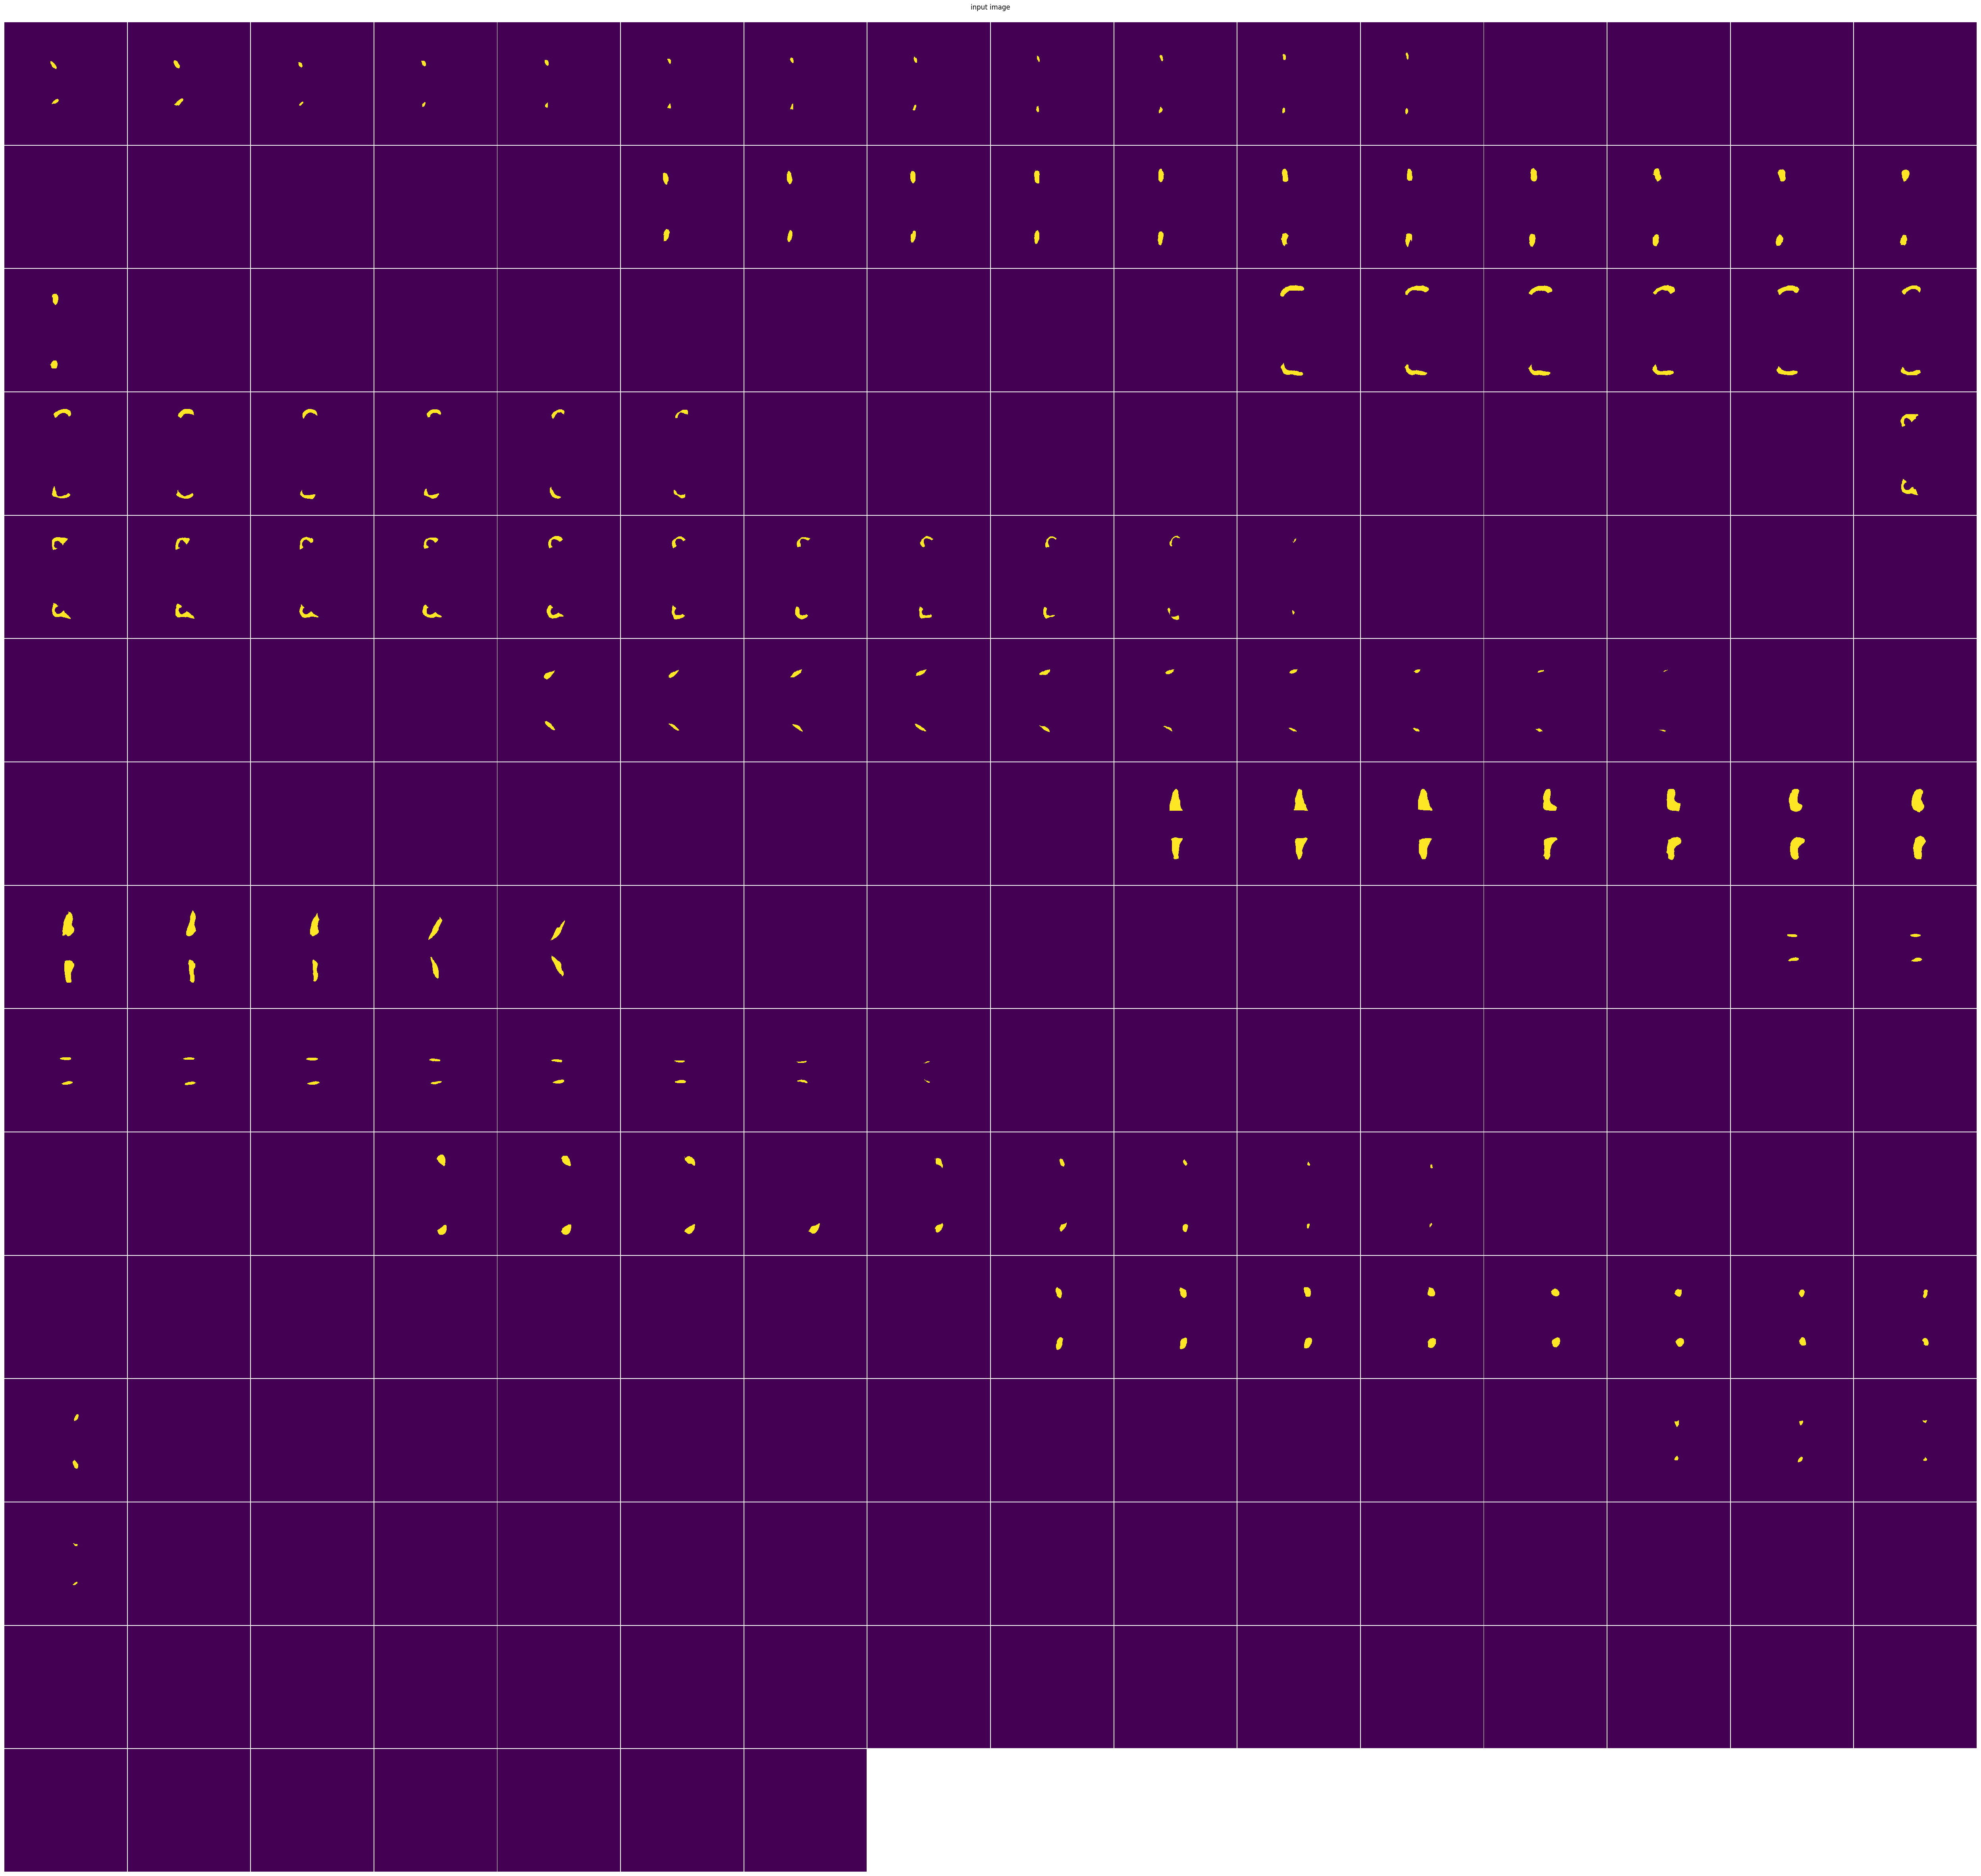

(<Figure size 5000x5000 with 1 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan,  0.,  0., ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0.,  0., nan],
        ...,
        [nan,  0.,  0., ..., nan, nan, nan],
        [nan,  0.,  0., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32))

In [56]:
matshow3d(
    volume=Label, #val_label_convert, val_output_convert
    fig=None,
    title="input image",
    figsize=(50, 50),
    every_n=1,
    frame_dim=-1,
    show=True,
)

In [76]:
Label=load_mask('./Data/Stage_1/Helsinki_label/THIGH_101.nii.gz')
Predict=load_mask('./Data/Stage_1/dints_0/Helsinki/THIGH_101_0000_seg.nii.gz')

def dice_calculate(y_true, y_pred, epsilon=1e-7):
    num_classes = y_true.shape[1]
    
    dice_scores = []

    for i in range(num_classes):
        true_i = y_true[:, i]
        pred_i = y_pred[:, i]

        intersection = (true_i * pred_i).sum()
        dice_score = (2. * intersection) / (true_i.sum() + pred_i.sum() + epsilon)
        dice_scores.append(dice_score)

    return sum(dice_scores) / num_classes

dice_calculate(Label, Predict)

0.4390723283222734

# Calculate the average Dice

In [95]:
Dice_log = []

for i in Dice_dict:
    Label = load_mask(i['label'])
    Predict = load_mask(i['predict'])
    Dice_log.append(dice_calculate(Label, Predict))

mean = sum(Dice_log) / len(Dice_log)
mean

0.4283619710615972